In [ ]:
import pandas as pd
import supy as sp
import sys
import matplotlib.pyplot as plt
# from .utilities import plot_var, plot_vars, list_var_forcing,dict_var_label

datafolder  = 'c:/Users/xbacos/OneDrive - University of Gothenburg/Artikel_4/OUT/'
sys.executable

In [ ]:
rc = datafolder + 'RunControl.nml'
df_state_init = sp.init_supy(rc)

# grid = df_state_init.index[1]
# df_forcing = sp.load_forcing_grid(rc, grid)
# 

In [ ]:
scheme_dict = 

{ 'StabilityMethod' : { 
    0: 'Not used.',
    1: 'Not used.',
    3: 'Momentum: unstable: Dyer [1974] modified by Högström [1988] stable: Van Ulden and Holtslag [1985] Heat: Dyer [1974] modified by Högström [1988] Not recommended in this version.'

	

3
	

    Momentum: Campbell and Norman [1998] (Eq 7.27, Pg97)

    Heat

        unstable: Campbell and Norman [1998]

        stable: Campbell and Norman [1998]

Recommended in this version.

4
	

    Momentum: Businger et al. [1971] modified by Högström [1988]

    Heat: Businger et al. [1971] modified by Högström [1988]

Not recommended in this version.

In [26]:
df_state_init.loc[1].filter(like='method').T

var                 ind_dim
localclimatemethod  0             0
netradiationmethod  0          1003
emissionsmethod     0             2
storageheatmethod   0             5
stabilitymethod     0             3
roughlenheatmethod  0             2
roughlenmommethod   0             2
faimethod           0             0
smdmethod           0             0
waterusemethod      0             0
diagmethod          0             2
Name: 1, dtype: object

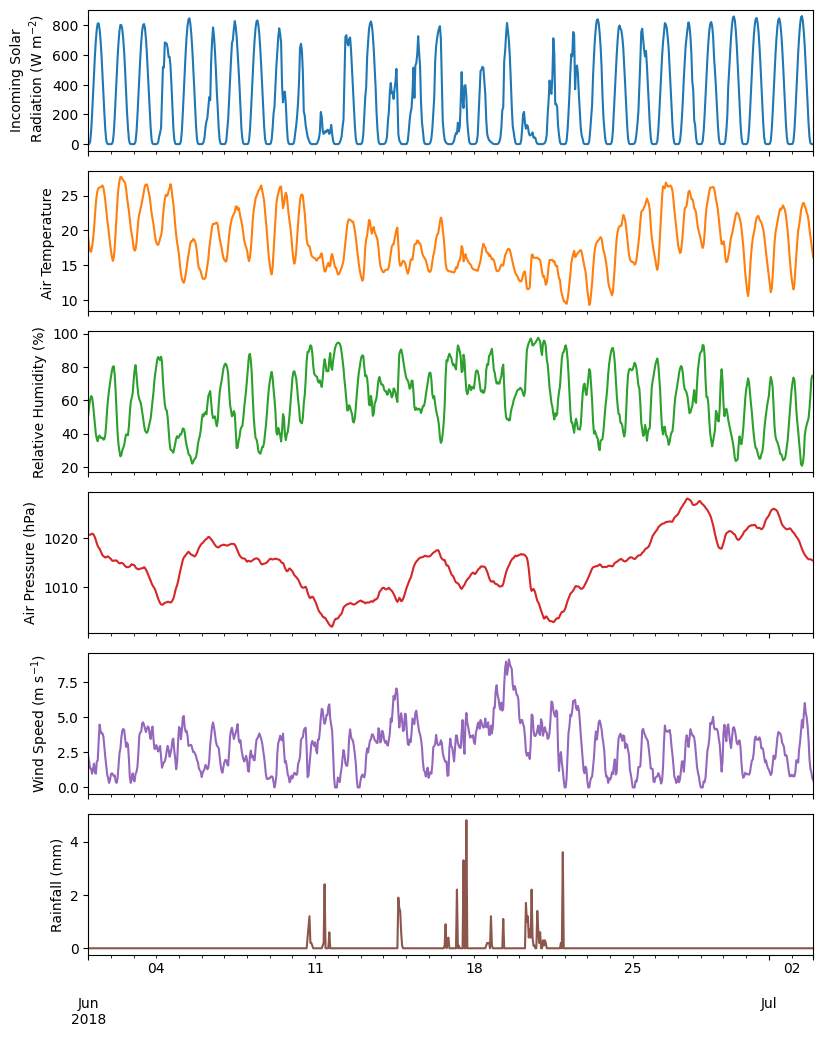

In [16]:

s = '2018-06-01'
e = '2018-07-02'

list_var_forcing = [
    "kdown",
    "Tair",
    "RH",
    "pres",
    "U",
    "rain",
]
dict_var_label = {
    "kdown": "Incoming Solar\n Radiation ($ \mathrm{W \ m^{-2}}$)",
    "Tair": "Air Temperature ",
    "RH": "Relative Humidity (%)",
    "pres": "Air Pressure (hPa)",
    "rain": "Rainfall (mm)",
    "U": "Wind Speed (m $\mathrm{s^{-1}}$)",
}
df_plot_forcing_x = (
    df_forcing.loc[s:e, list_var_forcing].copy().shift(-1).dropna(how="any")
)
df_plot_forcing = df_plot_forcing_x.resample("1h").mean()
df_plot_forcing["rain"] = df_plot_forcing_x["rain"].resample("1h").sum()

axes = df_plot_forcing.plot(subplots=True, figsize=(8, 12), legend=False,)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha="center")
for ax, var in zip(axes, list_var_forcing):
    _ = ax.set_ylabel(dict_var_label[var])

In [6]:
def process_in_chunks(df_state_init, df_forcing, chunk_size=5):
    df_output_list = []
    df_state_final_list = []
   
    # Calculate the number of chunks needed
    num_chunks = (len(df_state_init) + chunk_size - 1) // chunk_size
   
    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size
        df_chunk = df_state_init.iloc[start_idx:end_idx]
       
        df_output, df_state_final = sp.run_supy(df_forcing, df_chunk)
        df_output_list.append(df_output)
        df_state_final_list.append(df_state_final)
   
    # Concatenate all chunks
    df_output_merge = pd.concat(df_output_list)
    df_state_final_merge = pd.concat(df_state_final_list)
   
    return df_output_merge, df_state_final_merge
 
 
if len(list(df_state_init.index)) > 5:
    # Run the function
    df_output_merge, df_state_final_merge = process_in_chunks(df_state_init, df_forcing.loc[s:e])
 
    # Get SUEWS info
    df_suews = df_output_merge.SUEWS

2024-11-27 10:59:28,250 - SuPy - INFO - ====================
2024-11-27 10:59:28,250 - SuPy - INFO - Simulation period:
2024-11-27 10:59:28,250 - SuPy - INFO -   Start: 2018-06-30 00:00:00
2024-11-27 10:59:28,250 - SuPy - INFO -   End: 2018-07-02 23:55:00
2024-11-27 10:59:28,250 - SuPy - INFO - 
2024-11-27 10:59:28,256 - SuPy - INFO - No. of grids: 5
2024-11-27 10:59:28,256 - SuPy - INFO - SuPy is running in serial mode
2024-11-27 11:03:24,192 - SuPy - INFO - Execution time: 235.9 s
2024-11-27 11:03:24,192 - SuPy - INFO - ====================

2024-11-27 11:03:24,192 - SuPy - INFO - ====================
2024-11-27 11:03:24,192 - SuPy - INFO - Simulation period:
2024-11-27 11:03:24,192 - SuPy - INFO -   Start: 2018-06-30 00:00:00
2024-11-27 11:03:24,192 - SuPy - INFO -   End: 2018-07-02 23:55:00
2024-11-27 11:03:24,192 - SuPy - INFO - 
2024-11-27 11:03:24,192 - SuPy - INFO - No. of grids: 5
2024-11-27 11:03:24,206 - SuPy - INFO - SuPy is running in serial mode
2024-11-27 11:06:19,491 - 

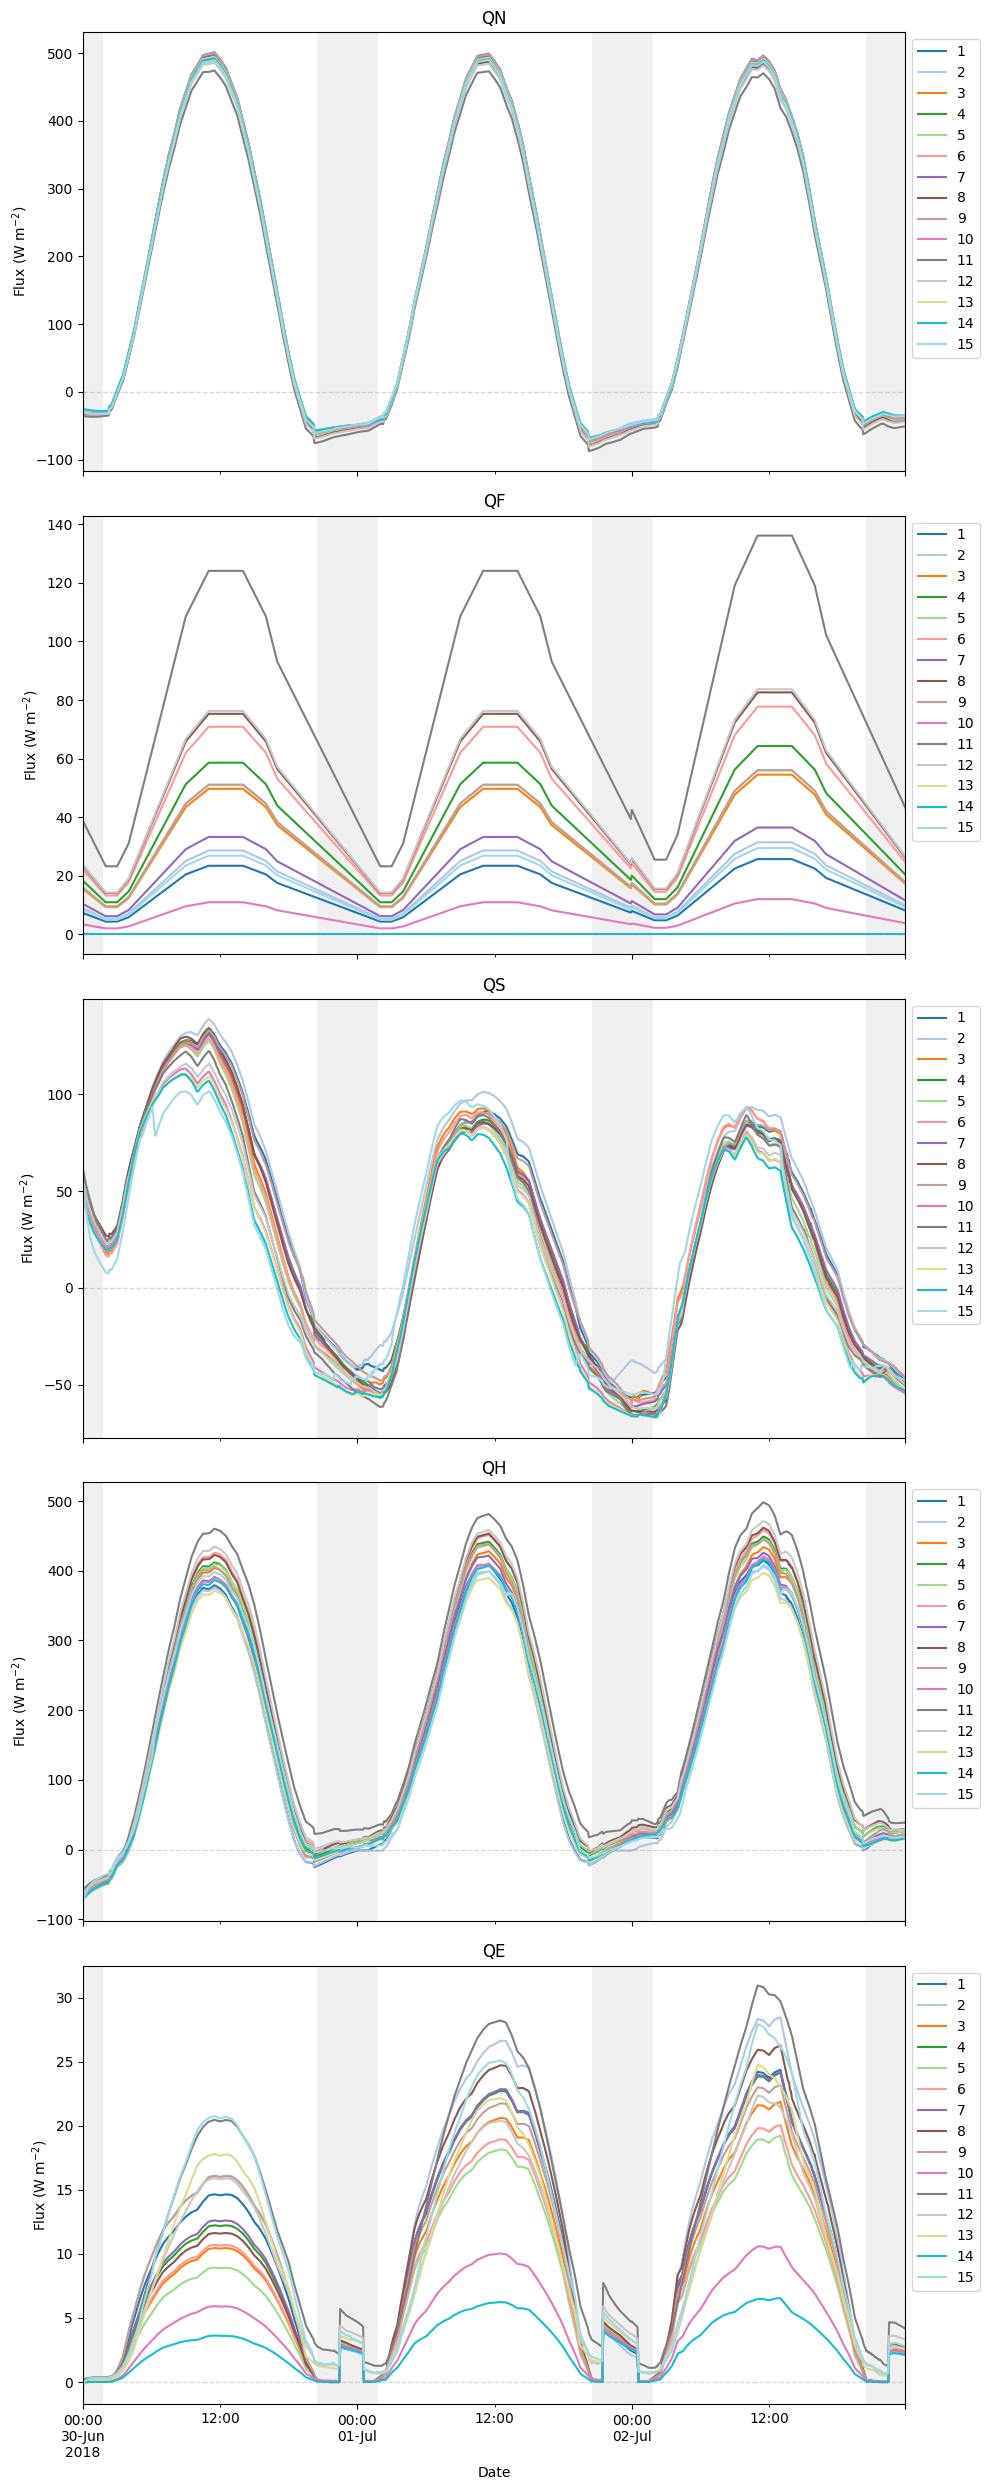

In [15]:
plot_vars(df_suews, s, e, ['QN', 'QF', 'QS', 'QH', 'QE'] )

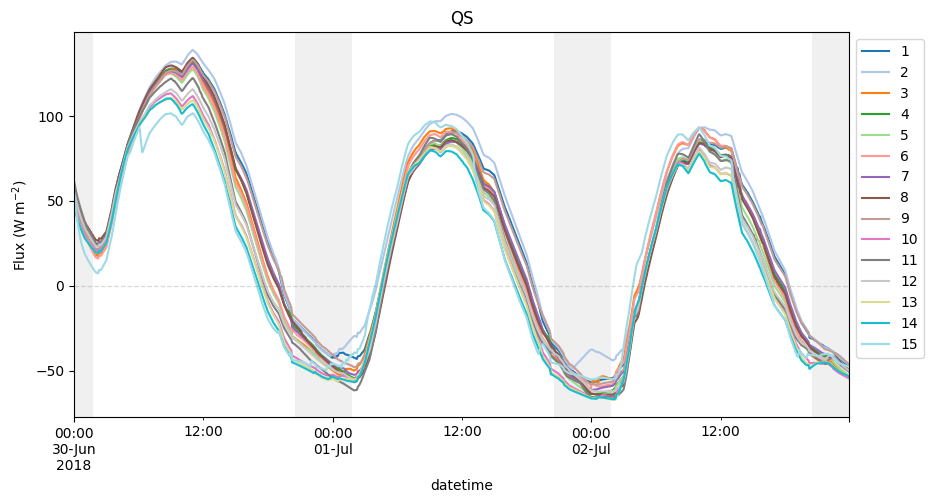

In [13]:
plot_var(df_suews, s,e, 'QS')

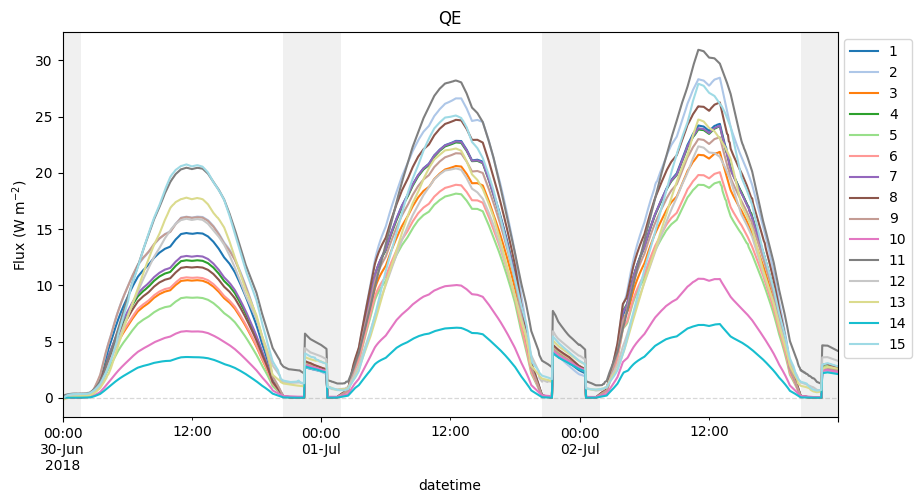

In [14]:
plot_var(df_suews, s,e, 'QE')

In [7]:
def plot_var(df_suews, start_date, end_date, var, figsize=False):
    # Filter the DataFrame for the specified date range and variable
        
    df_filtered = df_suews.loc[(slice(None), slice(start_date, end_date)), [var, 'Kdown']]
    
    # Pivot the DataFrame to have grids as columns
    df_plot = df_filtered[var].unstack(level=0)
    kdown_plot = df_filtered['Kdown'].unstack(level=0)

    if figsize is False:
        figsize = (10, 5)
    
    # Check if df_plot is empty
    if df_plot.empty:
        print("No data available for the specified date range and variable.")
        return
    figsize=(10,5)
    # Plot the data
    fig, ax = plt.subplots(figsize=figsize)
    df_plot.plot(ax=ax, title=var, cmap ='tab20')
    ax.axhline(y=0, linestyle='--', alpha=0.3, color='grey', linewidth = 0.9)
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    plt.ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
    
    # Shade areas where Kdown is 0
    for column in kdown_plot.columns:
        zero_regions = kdown_plot[column] < 5
        for start, end in zip(zero_regions.index[zero_regions & ~zero_regions.shift(1, fill_value=False)], 
                              zero_regions.index[zero_regions & ~zero_regions.shift(-1, fill_value=False)]):
            ax.axvspan(start, end, color='grey', alpha=0.008, linewidth= 0)


def plot_vars(df_suews, start_date, end_date, vars, figsize=False):
    # Filter the DataFrame for the specified date range and variables
    df_filtered = df_suews.loc[(slice(None), slice(start_date, end_date)), vars + ['Kdown']]
    
    # Pivot the DataFrame to have grids as columns
    df_plots = {var: df_filtered[var].unstack(level=0) for var in vars}
    kdown_plot = df_filtered['Kdown'].unstack(level=0)

    if not figsize:
        figsize = (10, 5 * len(vars))
    
    # Check if any df_plot is empty
    if any(df_plot.empty for df_plot in df_plots.values()):
        print("No data available for the specified date range and variables.")
        return
    
    # Plot the data
    fig, axes = plt.subplots(nrows=len(vars), ncols=1, figsize=figsize, sharex=True)
    
    if len(vars) == 1:
        axes = [axes]
    
    for ax, var in zip(axes, vars):
        df_plots[var].plot(ax=ax, title=var, cmap='tab20')
        ax.axhline(y=0, linestyle='--', alpha=0.3, color='grey', linewidth=0.9)
        ax.legend(bbox_to_anchor=(1.0, 1.0))
        ax.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
        
        # Shade areas where Kdown is 0
        for column in kdown_plot.columns:
            zero_regions = kdown_plot[column] < 5
            for start, end in zip(zero_regions.index[zero_regions & ~zero_regions.shift(1, fill_value=False)], 
                                  zero_regions.index[zero_regions & ~zero_regions.shift(-1, fill_value=False)]):
                ax.axvspan(start, end, color='grey', alpha=0.008, linewidth=0)
    
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

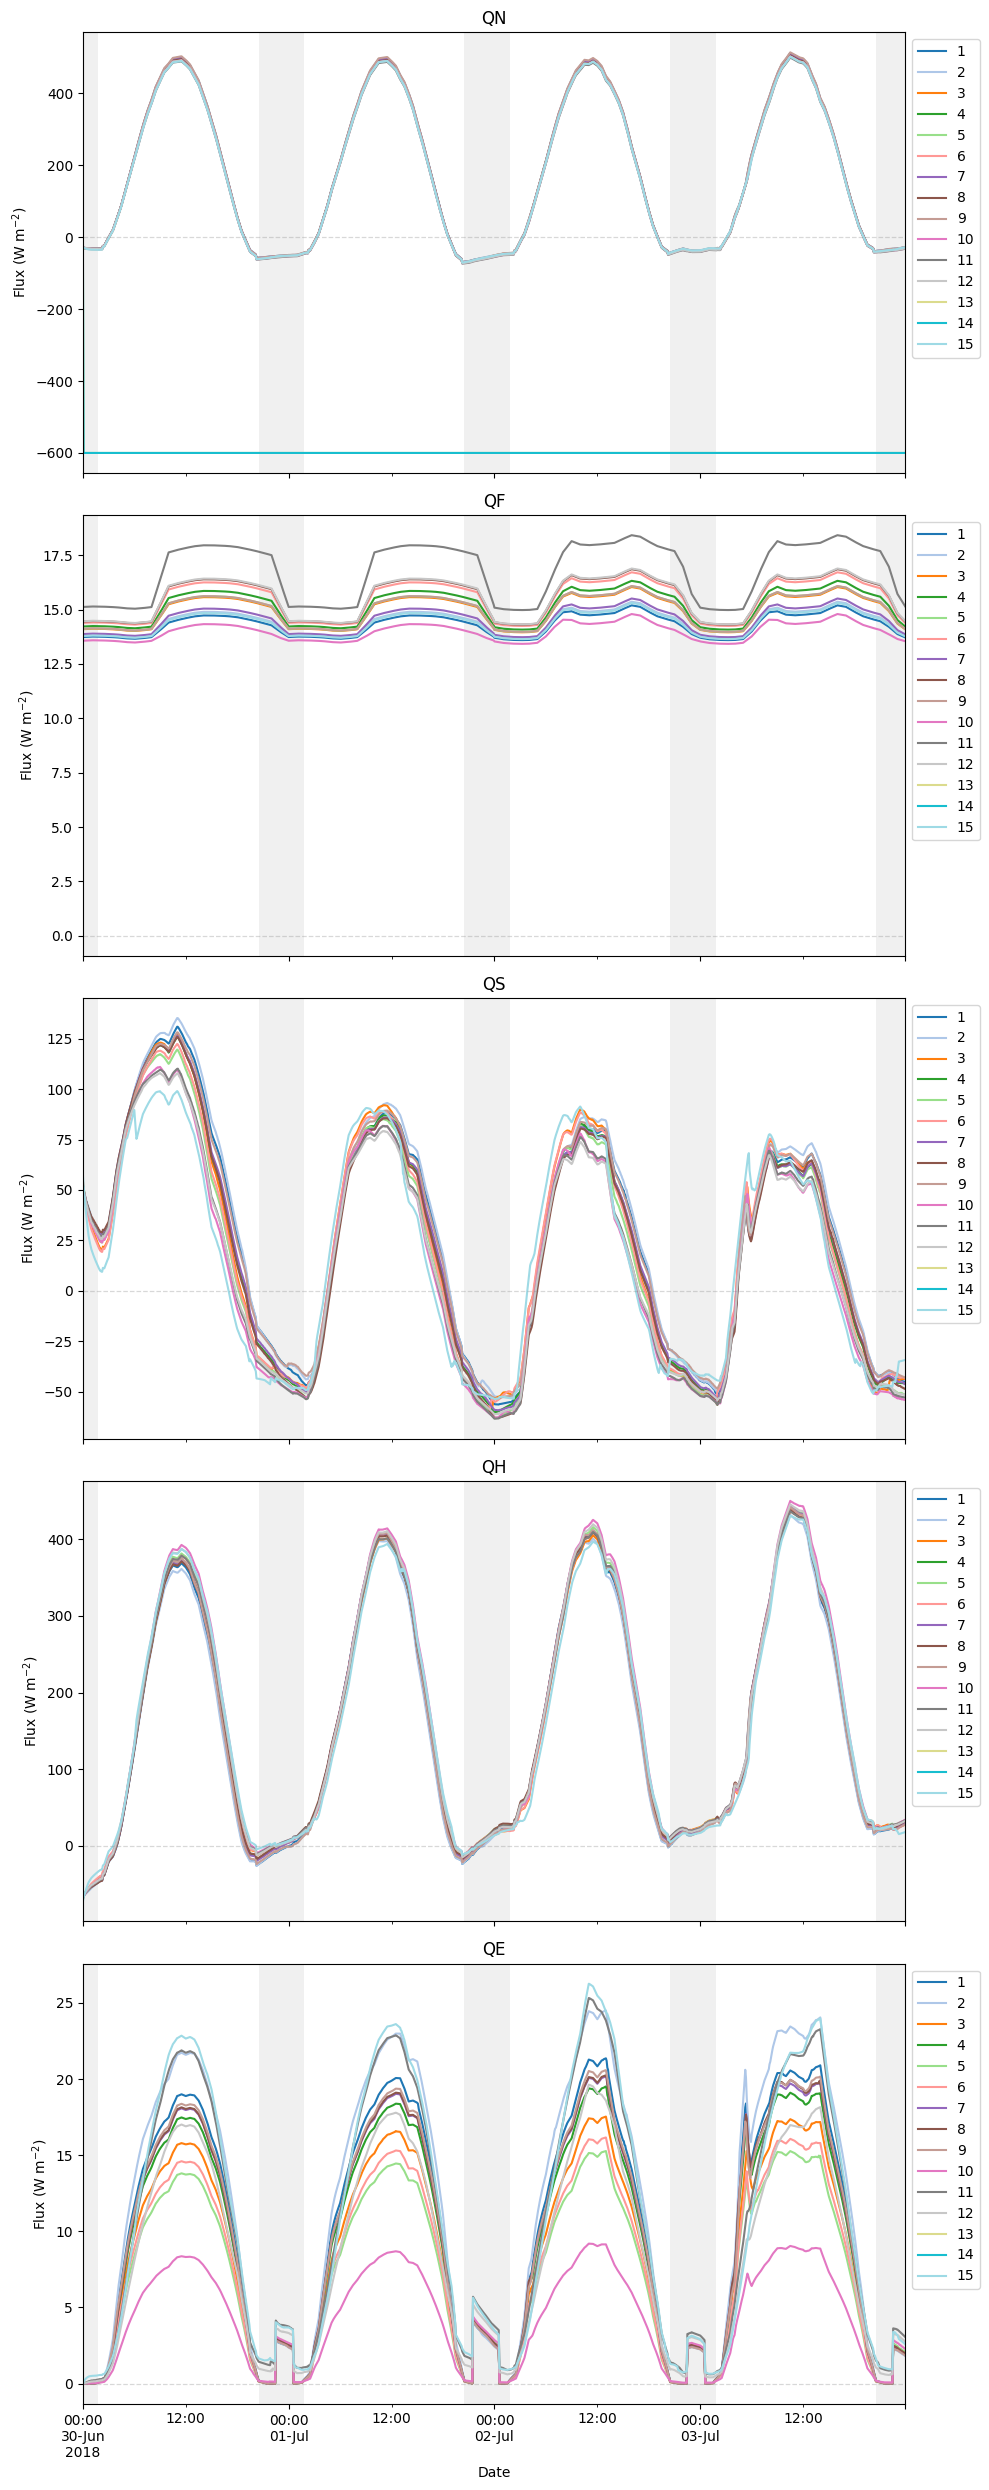

In [9]:
plot_vars(df_suews, s, e, ['QN', 'QF', 'QS', 'QH', 'QE'] )


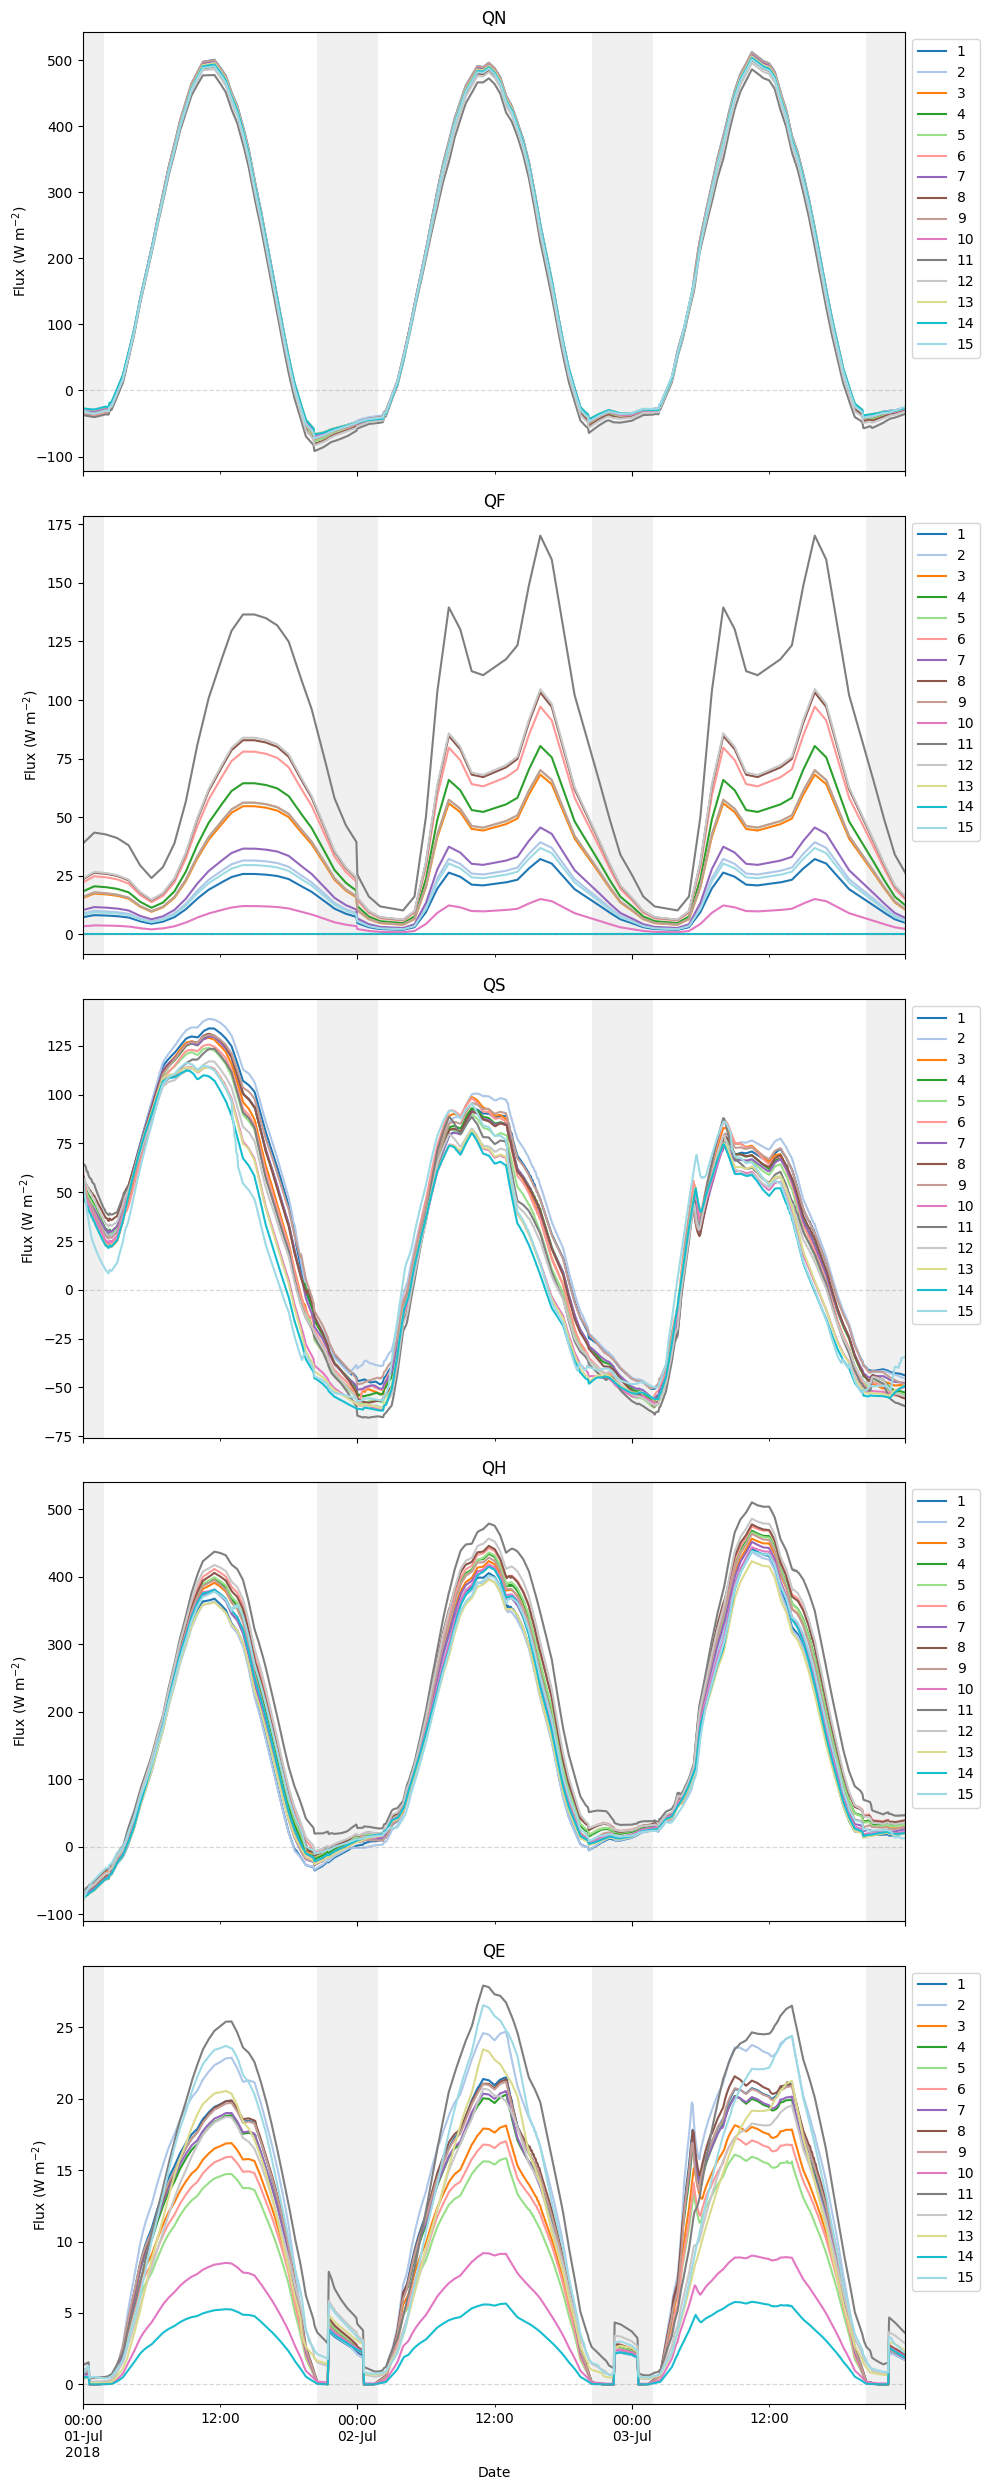

In [51]:
s = '2018-07-01'
e = '2018-07-03'
plot_vars(df_suews, s, e, ['QN', 'QF', 'QS', 'QH', 'QE'] )


In [43]:
df_suews

var                       Kdown  Kup       Ldown         Lup      Tsurf  \
grid datetime                                                             
1    2018-07-01 00:00:00    0.0  0.0  329.762465  359.241137   6.833281   
     2018-07-01 00:05:00    0.0  0.0  329.468949  359.142105   6.801490   
     2018-07-01 00:10:00    0.0  0.0  329.175417  359.420204   6.957059   
     2018-07-01 00:15:00    0.0  0.0  328.881875  359.338106   6.975293   
     2018-07-01 00:20:00    0.0  0.0  328.588329  359.197682   6.975046   
...                         ...  ...         ...         ...        ...   
15   2018-07-03 23:35:00    0.0  0.0  373.792757  400.312516  18.511499   
     2018-07-03 23:40:00    0.0  0.0  373.913238  400.027398  18.441731   
     2018-07-03 23:45:00    0.0  0.0  374.034099  399.740417  18.382866   
     2018-07-03 23:50:00    0.0  0.0  374.155361  399.453901  18.325432   
     2018-07-03 23:55:00    0.0  0.0  374.277047  399.167912  18.268259   

var                              QN        QF         QS         QH        QE  \
grid datetime                                                                   
1    2018-07-01 00:00:00 -29.478672  7.325223  52.206436 -75.046336  0.686450   
     2018-07-01 00:05:00 -29.673156  7.398475  51.651337 -74.603140  0.677122   
     2018-07-01 00:10:00 -30.244787  7.471727  48.172053 -71.659178  0.714065   
     2018-07-01 00:15:00 -30.456231  7.544979  46.933948 -70.562734  0.717535   
     2018-07-01 00:20:00 -30.609353  7.618232  45.932477 -69.641468  0.717869   
...                             ...       ...        ...        ...       ...   
15   2018-07-03 23:35:00 -26.519759  6.298377 -35.030999  12.435474  2.374143   
     2018-07-03 23:40:00 -26.114160  6.144758 -34.858158  12.558899  2.329857   
     2018-07-03 23:45:00 -25.706319  5.991139 -34.692784  12.691486  2.286119   
     2018-07-03 23:50:00 -25.298540  5.837520 -34.529839  12.826324  2.242495   
     2018-07-03 23:55:00 -24.890865  5.683901 -34.369302  12.963359  2.198979   

var                       ...  MeltWater  MeltWStore  SnowCh  SnowRPaved  \
grid datetime             ...                                              
1    2018-07-01 00:00:00  ...        0.0         0.0     0.0         0.0   
     2018-07-01 00:05:00  ...        0.0         0.0     0.0         0.0   
     2018-07-01 00:10:00  ...        0.0         0.0     0.0         0.0   
     2018-07-01 00:15:00  ...        0.0         0.0     0.0         0.0   
     2018-07-01 00:20:00  ...        0.0         0.0     0.0         0.0   
...                       ...        ...         ...     ...         ...   
15   2018-07-03 23:35:00  ...        0.0         0.0     0.0         0.0   
     2018-07-03 23:40:00  ...        0.0         0.0     0.0         0.0   
     2018-07-03 23:45:00  ...        0.0         0.0     0.0         0.0   
     2018-07-03 23:50:00  ...        0.0         0.0     0.0         0.0   
     2018-07-03 23:55:00  ...        0.0         0.0     0.0         0.0   

var                       SnowRBldgs         Ts         T2        Q2  \
grid datetime                                                          
1    2018-07-01 00:00:00         0.0   6.828699  -6.042515  6.082012   
     2018-07-01 00:05:00         0.0   6.781750  -6.009205  6.069185   
     2018-07-01 00:10:00         0.0   6.973582  -5.308543  6.064046   
     2018-07-01 00:15:00         0.0   6.988857  -5.101326  6.053170   
     2018-07-01 00:20:00         0.0   6.987344  -4.941029  6.041665   
...                              ...        ...        ...       ...   
15   2018-07-03 23:35:00         0.0  18.494298  17.313523  9.659455   
     2018-07-03 23:40:00         0.0  18.436115  17.255166  9.674605   
     2018-07-03 23:45:00         0.0  18.378371  17.196815  9.689495   
     2018-07-03 23:50:00         0.0  18.320734  17.138466  9.704127   
     2018-07-03 23:55:00         0.0  18.263201  17.080119  9.718503   

var                            U10         R

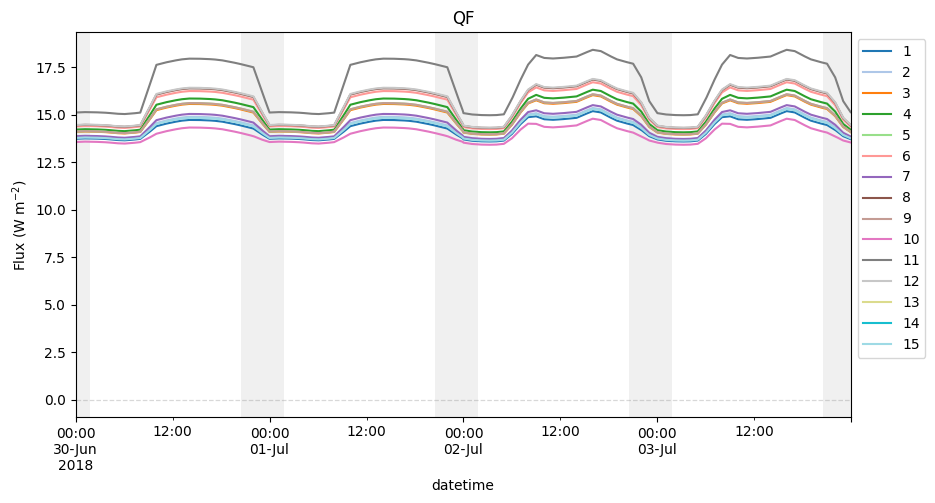

In [8]:
plot_var(df_suews, s, e, 'QF')

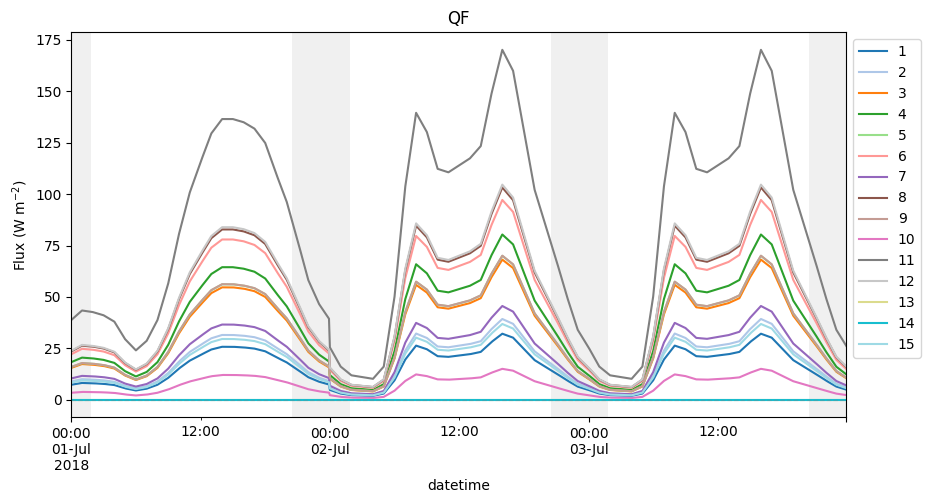

In [ ]:
plot_var(df_suews, s, e, 'QF')

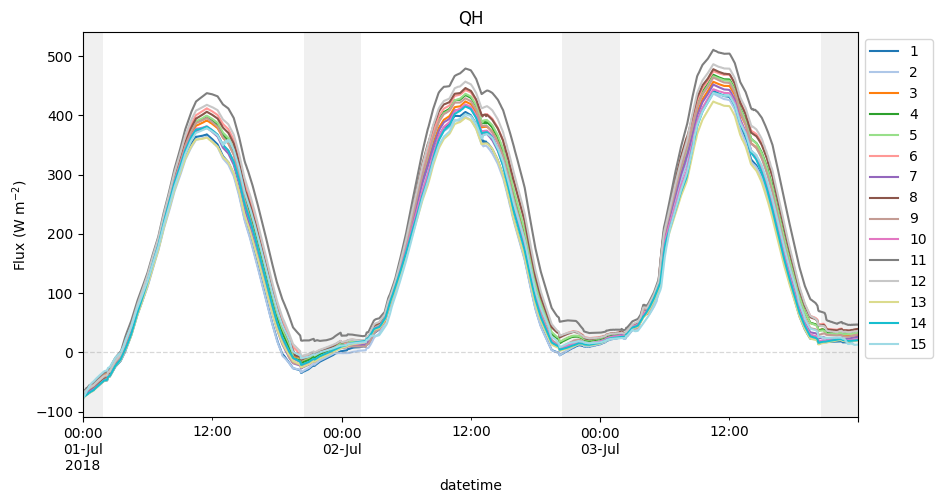

In [18]:
plot_var(df_suews, s, e, 'QH')

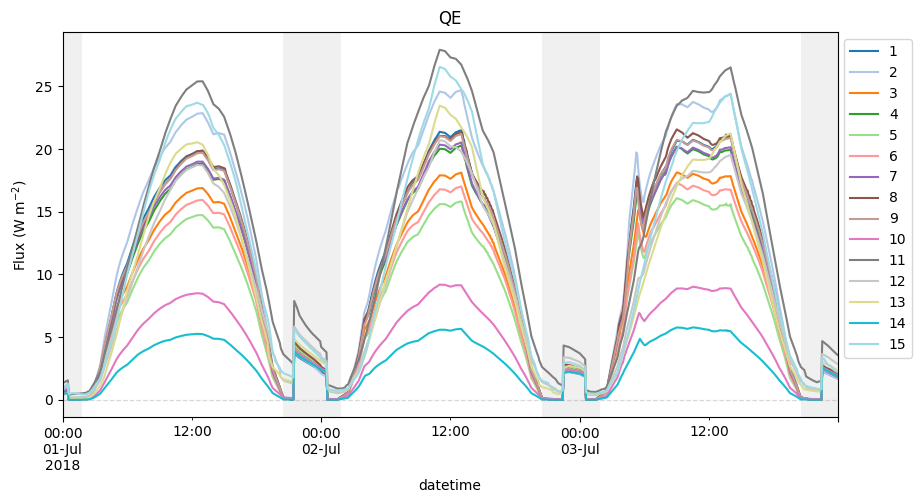

In [19]:
plot_var(df_suews, s, e, 'QE')

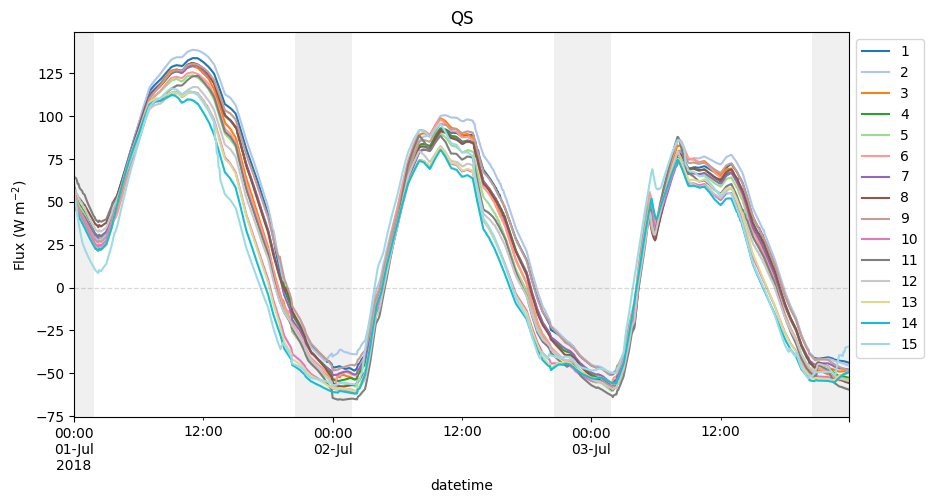

In [20]:
plot_var(df_suews, s, e, 'QS')

In [ ]:
df_SUEWS.loc[s:e, 'QS']



2024-11-26 08:33:55,641 - SuPy - INFO - ====================
2024-11-26 08:33:55,641 - SuPy - INFO - Simulation period:
2024-11-26 08:33:55,641 - SuPy - INFO -   Start: 2012-01-01 00:05:00
2024-11-26 08:33:55,641 - SuPy - INFO -   End: 2013-01-01 00:00:00
2024-11-26 08:33:55,641 - SuPy - INFO - 
2024-11-26 08:33:55,648 - SuPy - INFO - No. of grids: 1
2024-11-26 08:33:55,648 - SuPy - INFO - SuPy is running in serial mode
2024-11-26 08:34:52,622 - SuPy - INFO - Execution time: 57.0 s
2024-11-26 08:34:52,622 - SuPy - INFO - ====================



In [10]:
grid = 11
df_output_suews = df_output['SUEWS']
df_output_suews.loc[grid].loc[:, ['QN', 'QS', 'QH', 'QE', 'QF']].describe()

var,QN,QS,QH,QE,QF
count,864.000000,864.000000,864.000000,864.000000,864.000000
mean,163.292252,22.860770,210.170043,12.836674,82.575236
std,200.088556,58.115480,174.660551,9.211578,47.844202
min,-91.675071,-65.536849,-64.806379,0.405836,10.209991
25%,-38.687357,-38.267558,48.445671,3.930990,38.714965
50%,125.421715,34.777572,166.532431,12.127601,89.337419
75%,363.499454,71.366250,393.886258,22.247876,122.874402
max,486.171041,123.601926,510.487864,27.908127,170.166512


In [16]:
grid = 13
df_output_suews = df_output['SUEWS']
df_output_suews.loc[grid].loc[:, ['QN', 'QS', 'QH', 'QE', 'QF']].describe()

var,QN,QS,QH,QE,QF
count,864.000000,864.000000,864.000000,864.000000,864.0
mean,179.780072,17.976432,152.178208,9.625432,0.0
std,202.187682,55.461880,149.254778,7.575043,0.0
min,-65.553903,-60.576116,-77.375780,0.045275,0.0
25%,-28.619940,-43.625381,17.326441,2.415181,0.0
50%,140.591089,23.844730,106.570544,8.550879,0.0
75%,383.231541,64.371970,302.632333,17.134804,0.0
max,505.622790,113.974454,423.252905,23.448937,0.0


In [7]:
df_output_suews_s = df_output_s['SUEWS']
df_output_suews_s.loc[1].loc[:, ['QN', 'QS', 'QH', 'QE', 'QF']].describe()

var,QN,QS,QH,QE,QF
count,105408.000000,105408.000000,105408.000000,105408.000000,105408.000000
mean,44.717182,42.906813,46.149689,19.271989,63.611310
std,138.604574,96.639833,47.800870,18.007402,23.876534
min,-84.461392,-62.708311,-59.598725,0.702377,25.642774
25%,-41.517294,-16.748994,8.231428,7.031860,40.774024
50%,-24.896468,-5.265291,29.271653,13.008435,66.515112
75%,80.946399,67.465850,73.588286,26.269259,84.704834
max,721.380788,525.411034,275.308586,186.544578,114.779527


In [11]:
# a dict for better display variable names
dict_var_disp = {
    'QN': '$Q^*$',
    'QS': r'$\Delta Q_S$',
    'QE': '$Q_E$',
    'QH': '$Q_H$',
    'QF': '$Q_F$',
    'Kdown': r'$K_{\downarrow}$',
    'Kup': r'$K_{\uparrow}$',
    'Ldown': r'$L_{\downarrow}$',
    'Lup': r'$L_{\uparrow}$',
    'Rain': '$P$',
    'Irr': '$I$',
    'Evap': '$E$',
    'RO': '$R$',
    'TotCh': '$\Delta S$',
}

In [18]:
grid = 11
ax_output = df_output_suews\
    .loc[grid]\
    .loc[s:e,
         ['QN', 'QS', 'QE', 'QH', 'QF']]\
    .rename(columns=dict_var_disp)\
    .plot()
_ = ax_output.set_xlabel('Date')
_ = ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
_ = ax_output.legend()

grid = 13
ax_output = df_output_suews\
    .loc[grid]\
    .loc[s:e,
         ['QN', 'QS', 'QE', 'QH', 'QF']]\
    .rename(columns=dict_var_disp)\
    .plot()
_ = ax_output.set_xlabel('Date')
_ = ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
_ = ax_output.legend()

KeyError: 11

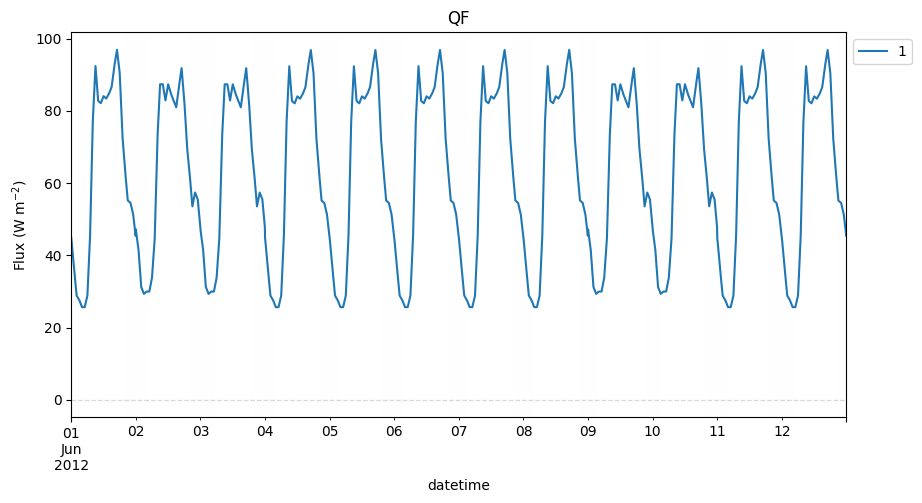

In [52]:
s = '2012-06-01'
e = '2012-06-12'
plot_var(df_SUEWS_s, s, e,  'QF')